## 1. Загрузите датасет ирисы Фишера из библиотеки sklearn.datasets.

In [96]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [162]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [97]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [98]:
target = 'class'
y = iris_data[target]
X = iris_data.drop(target,axis=1)

## 2. Сделайте hold-out разбиение данных. Для этого разделите данные на обучающую и валидационную выборки и выведите на экран соответствующие индексы разбиения.

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5,shuffle=False)

In [100]:
y_train.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            117, 118, 119, 120, 121, 122, 123, 124, 125, 126],
           dtype='int64', length=127)

In [101]:
y_test.index

Int64Index([127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
           dtype='int64')

## 3. Теперь сделайте разбиение перемешанных данных, зафиксировав воспроизводимость выбора данных после перемешивания, указав значение параметра random_state=42 и выведите на экран соответствующие индексы разбиения.

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [103]:
y_train.index

Int64Index([128, 131, 145, 108, 143,  45,  30,  22,  15,  65,
            ...
             87,  74, 121, 149,  20,  71, 106,  14,  92, 102],
           dtype='int64', length=127)

In [104]:
y_test.index

Int64Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
              9,  19,  56, 104,  69,  55, 132,  29, 127,  26],
           dtype='int64')

## 4. Обучите модель логистической регрессии на обучающих данных. Выведите значения коэффициентов модели, полученных в результате обучения. Сделайте предсказание на тестовом наборе признаков. Выведите значение метрик accuracy и f1-score.

In [105]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


<AxesSubplot:>

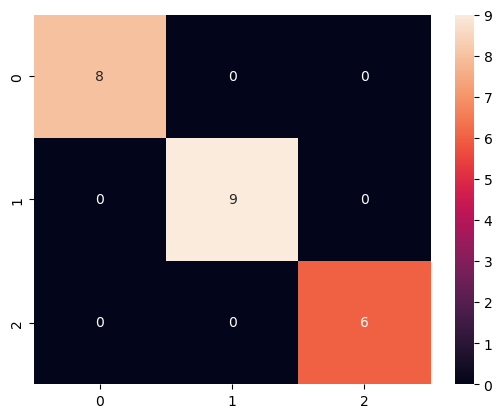

In [106]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

1.0
1.0


<AxesSubplot:>

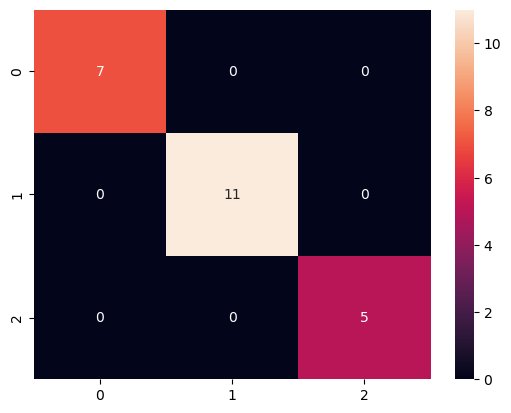

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

0.8695652173913043
0.8745098039215686


<AxesSubplot:>

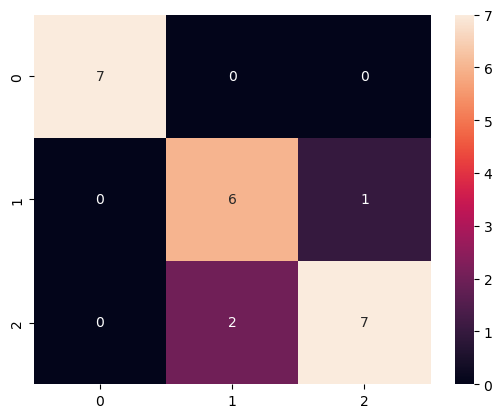

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## 5. Разделите данные на обучающую и валидационную выборки по новому в соотношении 75-25. Обучите модель на этих данных, выведите значения получившихся коэффициентов модели. Выведите значения метрик и сравните их со значениями из предыдущего пункта. Сделайте вывод о том, влияет ли способ разбиения на результат.

0.9210526315789473
0.9199999999999999


<AxesSubplot:>

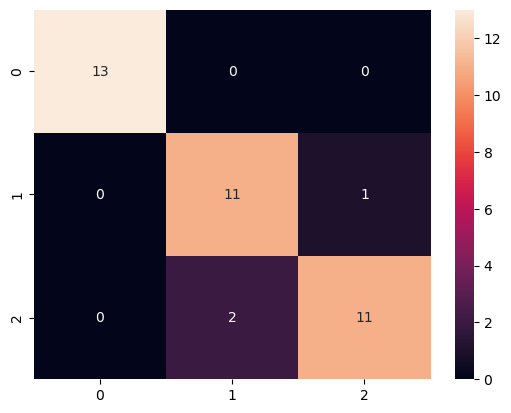

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Способ разбиения влияет на значение метрик

## 6. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию). Сравните полученные метрики с метриками, которые были при hold-out разбиении.

In [110]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score

In [111]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)
X=iris.data
y=iris.target

In [112]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97

Делаем кросс-валидацию: обучаем модель на каждом из фолдов и записываем полученные метрики в массивы

In [113]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

In [114]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]


In [115]:
import numpy as np
print("Среднее по кросс-валидации: ", np.array(metrics_accuracy).mean())
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.94
Среднее по кросс-валидации:  0.9377247812705329


## 7. Теперь сделайте ту же самую перекрёстную проверку модели, используя библиотечную функцию cross_val_score. Убедитесь, что получится тот же результат.

In [116]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


## 8. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию) со стратификацией. Проделайте всё тоже самое, что и в предыдущем пункте.

In [117]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

In [118]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

In [119]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.   1.   0.92]
Среднее по кросс-валидации:  0.9733333333333333


## 9. Теперь сделайте перекрёстную проверку, изпользуя leave-one-out разбиение. Проделайте всё тоже самое, что и в предыдущем пункте.

In [120]:
loo = LeaveOneOut()

In [121]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

In [122]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


# Дополнительные задания

## 1. Изучите разбиение Leave-P-Out. Продемонстрируйте работу этого алгоритма на примере из лабораторной работы.

In [123]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(2)

In [124]:
lpo.get_n_splits(X)

11175

In [125]:
for i, (train_index, test_index) in enumerate(lpo.split(X)):
     print(f"Fold {i}:")
     print(f"  Train: index={train_index}")
     print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
  Test:  index=[0 1]
Fold 1:
  Train: index=[  1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  8

Fold 540:
  Train: index=[  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
  Test:  index=[  3 100]
Fold 541:
  Train: index=[  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  8

Fold 1918:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
  Test:  index=[13 73]
Fold 1919:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  75  76  77  78  79  80  8

Fold 2405:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  21  22  23  24  25  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
  Test:  index=[17 26]
Fold 2406:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  21  22  23  24  25  26  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  8

Fold 3229:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
  Test:  index=[23 79]
Fold 3230:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  8

Fold 3332:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
  Test:  index=[24 57]
Fold 3333:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  8

Fold 3977:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
  Test:  index=[29 92]
Fold 3978:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  8

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [126]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = lpo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. ... 1. 1. 1.]
Среднее по кросс-валидации:  0.9405219985085758


In [137]:
for i, (train_index, test_index) in enumerate(lpo.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

In [138]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [139]:
print("Среднее по кросс-валидации: ", np.array(metrics_accuracy).mean())
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9550295222758991
Среднее по кросс-валидации:  0.9405212477793117


## 2. Изучите функцию cross_validate(). Продемонстрируйте работу этой функции на тех же данных.

In [127]:
from sklearn.model_selection import cross_validate
cv_metrics = cross_validate(model,X,y,cv=lpo,scoring='f1_micro',return_train_score=True)

In [128]:
cv_metrics

{'fit_time': array([0.00200057, 0.00099945, 0.        , ..., 0.        , 0.        ,
        0.00100327]),
 'score_time': array([0.00099993, 0.        , 0.00099969, ..., 0.00100088, 0.00100088,
        0.0010016 ]),
 'test_score': array([1., 1., 1., ..., 1., 1., 1.]),
 'train_score': array([0.95945946, 0.95945946, 0.96621622, ..., 0.96621622, 0.96621622,
        0.96621622])}

In [129]:
f1_train = cv_metrics['train_score'].mean()
f1_test = cv_metrics['test_score'].mean()
print('train f1-score:', f1_train)
print('test f1-score:', f1_test)

train f1-score: 0.962482616845033
test f1-score: 0.9550335570469799


## 3. Оцените при помощи кросс-валидации другие метрики эффективности для этой же модели.


In [130]:
cv_metrics = cross_validate(model,X,y,cv=lpo,scoring='accuracy',return_train_score=True)

In [131]:
cv_metrics

{'fit_time': array([0.00099993, 0.00099969, 0.00099993, ..., 0.        , 0.00102258,
        0.00101566]),
 'score_time': array([0.00099969, 0.        , 0.        , ..., 0.00102782, 0.        ,
        0.        ]),
 'test_score': array([1., 1., 1., ..., 1., 1., 1.]),
 'train_score': array([0.95945946, 0.95945946, 0.96621622, ..., 0.96621622, 0.96621622,
        0.96621622])}

In [132]:
f1_train_1 = cv_metrics['train_score'].mean()
f1_test_1 = cv_metrics['test_score'].mean()
print('train f1-score:', f1_train_1)
print('test f1-score:', f1_test_1)

train f1-score: 0.962482616845033
test f1-score: 0.9550335570469799


In [130]:
cv_metrics = cross_validate(model,X,y,cv=lpo,scoring='accuracy',return_train_score=True)

In [131]:
cv_metrics

{'fit_time': array([0.00099993, 0.00099969, 0.00099993, ..., 0.        , 0.00102258,
        0.00101566]),
 'score_time': array([0.00099969, 0.        , 0.        , ..., 0.00102782, 0.        ,
        0.        ]),
 'test_score': array([1., 1., 1., ..., 1., 1., 1.]),
 'train_score': array([0.95945946, 0.95945946, 0.96621622, ..., 0.96621622, 0.96621622,
        0.96621622])}

In [132]:
f1_train_1 = cv_metrics['train_score'].mean()
f1_test_1 = cv_metrics['test_score'].mean()
print('train f1-score:', f1_train_1)
print('test f1-score:', f1_test_1)

train f1-score: 0.962482616845033
test f1-score: 0.9550335570469799


## 4. Сравните кросс-валидированные результаты работы нескольких моделей на одних и тех же данных.

In [140]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [141]:
cv_metrics = cross_validate(model,X,y,cv=loo,scoring='accuracy',return_train_score=True)

In [142]:
cv_metrics

{'fit_time': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.00066376e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.01806831e-03,
        0.00000000e+00, 0.00000000e+00, 4.49895859e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.00543213e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.98135185e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.10866737e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.03642654e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+

In [143]:
f1_train_2 = cv_metrics['train_score'].mean()
f1_test_2 = cv_metrics['test_score'].mean()
print('train f1-score:', f1_train_2)
print('test f1-score:', f1_test_2)

train f1-score: 1.0
test f1-score: 0.96


In [146]:
from sklearn.svm import SVC
model = SVC()

In [147]:
cv_metrics = cross_validate(model,X,y,cv=loo,scoring='accuracy',return_train_score=True)

In [148]:
cv_metrics

{'fit_time': array([0.00432181, 0.00400233, 0.00400114, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00400066,
        0.0040009 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00400114, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0039978 , 0.        , 0.        ,
        0.        , 0.00401831, 0.        , 0.        , 0.03438067,
        0.00333786, 0.0020678 , 0.00205255, 0.00207305, 0.00200605,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00400162, 0.00428987, 0.00409913, 0.00400043, 0.00400066,
        0.00431919, 0.00401354, 0.00439477, 0.00401211, 0.00401139,
        0.00400043, 0.        , 0.        , 0.00407863, 0.00401616,
        0.        , 0.00399995, 0.        , 0.0044384 , 0.00401759,
        0.00401878, 0.00426579, 0.        , 0.        , 0.        ,
        0.        , 0.0012753 , 0.00

In [149]:
cv_metrics = cross_validate(model,X,y,cv=loo,scoring='accuracy',return_train_score=True)

cv_metrics

{'fit_time': array([0.        , 0.        , 0.00399923, 0.00423241, 0.00401545,
        0.00400138, 0.00419784, 0.00400877, 0.        , 0.00380492,
        0.        , 0.00399995, 0.        , 0.        , 0.0040102 ,
        0.00400424, 0.00416088, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00438786,
        0.00415063, 0.        , 0.        , 0.        , 0.        ,
        0.0040009 , 0.        , 0.        , 0.        , 0.        ,
        0.00401711, 0.0039928 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00402856, 0.        , 0.        ,
        0.        , 0.        , 0.00400114, 0.        , 0.00400567,
        0.0040009 , 0.        , 0.00398564, 0.00435734, 0.        ,
        0.00371647, 0.00400329, 0.        , 0.00400639, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0040195 , 0.        , 0.  

In [150]:
f1_train_3 = cv_metrics['train_score'].mean()
f1_test_3 = cv_metrics['test_score'].mean()
print('train f1-score:', f1_train_3)
print('test f1-score:', f1_test_3)

train f1-score: 0.9727964205816555
test f1-score: 0.9666666666666667


In [ ]:
1: logistic, 2: decisiontree, 3: svm

In [151]:
f1_train_1, f1_train_2, f1_train_3, f1_test_1,f1_test_2, f1_test_3

(0.962482616845033,
 1.0,
 0.9727964205816555,
 0.9550335570469799,
 0.96,
 0.9666666666666667)

## 5. Повторите анализ на другом датасете: встроенном наборе данных о диабете.

In [189]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


In [191]:
X = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])

In [192]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [198]:
y = pd.DataFrame(diabetes['target'],columns=['disease_progression'])

In [199]:
y

,disease_progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [224]:
X = diabetes.data
y = diabetes.target

In [225]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [226]:
cv_metrics = cross_validate(model,X,y,cv=5,scoring='r2',return_train_score=True)
cv_metrics

{'fit_time': array([0.00103736, 0.00102997, 0.00103688, 0.0010078 , 0.00102949]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.42955643, 0.52259828, 0.4826784 , 0.42650827, 0.55024923]),
 'train_score': array([0.52428374, 0.51032284, 0.52379623, 0.53137699, 0.50775176])}

In [227]:
train = cv_metrics['train_score'].mean()
test = cv_metrics['test_score'].mean()
print('train f1-score:', train)
print('test f1-score:', test)

train f1-score: 0.5195063112153777
test f1-score: 0.48231812211149394


## 6. Сделайте k-блочную перекрёстную проверку (KFold) модели логистической регрессии, предварительно стандартизировав данные. Для этого создайте конвейер с помощью make_pipeline из библиотеки sklearn.pipeline, который будет стандартизировать, а затем выполнять логистическую регрессию.

In [228]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [230]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
y = iris_data[target]
X = iris_data.drop(target,axis=1)
cv_results = cross_val_score(pipeline, X, y, cv=kf,scoring='accuracy', n_jobs=-1)
print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [1.   0.92 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.043204937989385725


In [232]:
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=15)

In [233]:
X = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
y = pd.DataFrame(diabetes['target'],columns=['disease_progression'])
X = diabetes.data
y = diabetes.target
from sklearn.linear_model import LinearRegression
model = LinearRegression()
cv_metrics = cross_validate(model,X,y,cv=skf,scoring='r2',return_train_score=True)
cv_metrics
train = cv_metrics['train_score'].mean()
test = cv_metrics['test_score'].mean()
print('train f1-score:', train)
print('test f1-score:', test)

train f1-score: 0.5200688874391014
test f1-score: 0.49308880081250345


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
